# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** [Mahreen Maknojia]  
**Date:** [09/14/2025]  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [511]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()
setwd("/workspaces/assignment-1-mahreen-maknojia") # Set to your project directory

[1] "/workspaces/assignment-1-mahreen-maknojia"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [512]:
# Import the messy sales dataset
# Set working directory to where the data file is located
messy_sales <- read_csv("data/messy_sales_data.csv")
print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print(paste("Column names:", paste(names(messy_sales), collapse = ", ")))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
[1] "Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity"


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [513]:
# Inspect the messy dataset
print("/workspaces/assignment-1-mahreen-maknojia/data/messy_sales_data.csv")
head(messy_sales, 10) # First 10 rows

[1] "/workspaces/assignment-1-mahreen-maknojia/data/messy_sales_data.csv"


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [514]:
'**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]

**YOUR OBSERVATIONS:**

[What I have noticed is that 1 little thing can make you not run your code. Its important to check everything and where things are supposed to go]'

[1] "**Data Quality Assessment:**\n\nBased on the imported messy_sales dataset, document all the data quality issues you observe:\n\n1. **Missing Values:** [Look for NA values - which columns have missing data?]\n\n2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]\n\n3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]\n\n4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]\n\n5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]\n\n**YOUR OBSERVATIONS:**\n\n[What I have noticed is that 1 little thing can make you not run your code. Its important to check everything and where things are supposed to go]"

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [515]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))# YOUR CODE HERE

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))# YOUR CODE HERE

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[complete.cases(messy_sales),]# YOUR CODE HERE

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"


# A tibble: 156 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             2 Alice Brown   Clothing                 573. 2023-10-21   
 2             3 Jane Doe      Electronics              488. 2023-12-28   
 3             4 Jane Doe      Electronics             5000  2023-06-16   
 4             5 John Smith    Books                    344. 2023-05-05   
 5             6 John Smith    Books                    435. 2023-11-28   
 6             7 Jane Doe      Home                     489. 2023-08-17   
 7             8 Jane Doe      Electronics              537. 2023-05-17   
 8             9 Jane Doe      Clothing                 793. 2023-08-13   
 9            10 Jane Doe      electronics              649. 2023-10-16   
10            11 Bob Johnson   ELECTRONICS              596. 2023-10-20   
# ℹ 146 more rows
# ℹ 1 more variable: Quantity <dbl>


In [516]:
"#### 2.2 Missing Value Treatment - Option A (Removal)
','

Create a dataset with all missing value rows removed and compare the results."

[1] "#### 2.2 Missing Value Treatment - Option A (Removal)\n','\n\nCreate a dataset with all missing value rows removed and compare the results."

In [517]:
# TODO: Remove all rows with missing values
sales_removed_na <- messy_sales[complete.cases(messy_sales),]

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [518]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [519]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  ### YOUR CODE HERE 
  uniqv <- unique(v[!is.na(v)])
  uniqv[which.max(tabulate(match(v, uniqv)))]
  ### Hint: Use unique(), tabulate(), match(), and which.max()
}

In [520]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
mode_name <- get_mode(sales_imputed$Customer_Name)
sales_imputed$Customer_Name[is.na(sales_imputed$Customer_Name)] <- mode_name

In [521]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
median_name <- median(sales_imputed$Quantity)
sales_imputed$Quantity[is.na(sales_imputed$Quantity)] <- median_name

In [522]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [523]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [524]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [525]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [526]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**
I would recommend the imputation approach for this dataset because it allows us to have data and be very precise. This ensures that we don't lose any valuable information while removing rows with missing values that are random. 
1. **What are the trade-offs between removal and imputation?**
The trade-offs between removal and imputation are that removal can lead to loss of valuable data and imputation causes assuptions about the data. Removal causes the data set to become smaller if the missing data is not random.


---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [527]:
"#### 3.1 Outlier Detection Using IQR Method
,"

'Apply the interquartile range method to identify outliers in Sales_Amount.'

[1] "#### 3.1 Outlier Detection Using IQR Method\n,"

[1] "Apply the interquartile range method to identify outliers in Sales_Amount."

In [528]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)  
IQR_sales <- Q3_sales - Q1_sales

In [529]:
### TODO: Calculate outlier thresholds
upper_threshold <-  Q1_sales - 1.5 * IQR_sales
lower_threshold <-  Q3_sales - 1.5 * IQR_sales

In [530]:
### TODO: Identify outliers
outliers <- # YOUR CODE HERE

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: 196.627628591842"
[1] "Upper threshold: -135.273443054502"
[1] "Number of outliers found: "
[1] "Outlier rows:"
[1] "Q1: 362.578164415014"


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

In [531]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [532]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- # YOUR CODE HERE

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: "
[1] "Rows removed: "


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


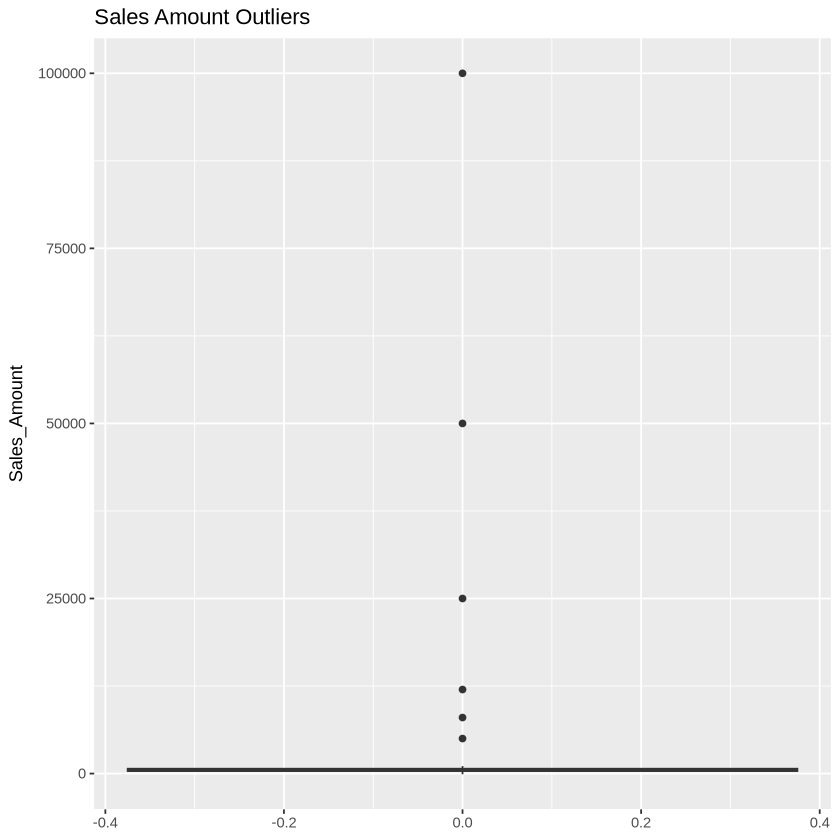

In [533]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- # YOUR CODE HERE
# Hint: ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [534]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- # YOUR CODE HERE
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: "
[1] "Rows removed: "


In [535]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [536]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(sales_outliers_capped$Sales_Amount < lower_threshold, lower_threshold,
                                      ifelse(sales_outliers_capped$Sales_Amount > upper_threshold, upper_threshold,
                                             sales_outliers_capped$Sales_Amount))
### Hint: Use ifelse() to replace values above/below thresholds

In [537]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -135.2734  196.6276


In [541]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 178"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [543]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped# Choose one: messy_sales, sales_removed_na, sales_imputed, sales_outliers_removed, or sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -135.3  -135.3  -135.3  -109.2  -135.3   196.6      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**
i chose the sales_outliers_capped dataset because it has the accurate data without any outliers This means that loses less quality data while getting rid of outliers. It is the most accurate data to me because we are not sacrificing any data and it is still clean.


### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [544]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric  Original_Data     Final_Data
1      Number of Rows            200            200
2      Missing Values             52             36
3   Mean Sales_Amount        1614.91        -109.17
4 Median Sales_Amount         531.29        -135.27
5            Outliers Check manually Check manually


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**
In a retail business scenario, if a customer didn't put their last name on a survey, it would be okay to remove that row because the last name is not necessary for analysis. However, if a customer didn't put their location or where they're based, then it would be better to impute that value because age can be important for demographic analysis.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.
**YOUR ANSWER:**
In a real business context, outliers in the Sales_Amount column could represent holiday sales or really slow days in business. these events don't really describe the overall sales trends, so they should be treated. However, if the outliers are due to errors in data entry, then they should be removed. 

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**
Missing values and outliers can cause inaccurate results such as giving a lower average sales if there are a lot of missing values. Outliers can skew the results and make it seem like sales are higher or lower than they actually are due to inaccurate trends.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**
Its important to be careful when removing or changing without changing the big picture. Giving accurate results and being transparent is important and makes you trustworthly in the future.


---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**